In [9]:
import math
import torch

import matplotlib.pyplot as plt 

# use a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.float

In [4]:
train_X = torch.linspace(0,1,15, dtype=dtype, device=device)
train_X = train_X.unsqueeze(1)

train_Y = torch.sin(train_X * (2 * math.pi)) + 0.15 * torch.randn_like(train_X)

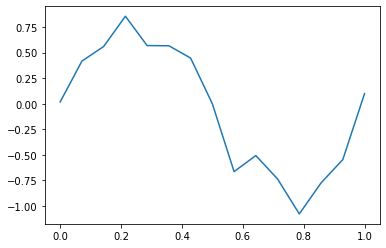

In [13]:
plt.plot(train_X.cpu(), train_Y.cpu())
plt.show()

### Initialize the model

PyTorch doesn't support inputing explicit bounds on the noise parameter. We need to manually register the constraint.

In [14]:
from botorch.models import SingleTaskGP
from gpytorch.constraints import GreaterThan


model = SingleTaskGP(train_X=train_X, train_Y=train_Y)
model.likelihood.noise_covar.register_constraint("raw_noise", GreaterThan(1e-5))